In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\Li Xiaokang\Desktop\null_importances_result\score_df\human_final_score_win31.csv")

In [3]:
all_data = []
feature_name = ['Binary','EAAC','PWM','CKSAAP','AA531','PSSM']

for f in feature_name:
    f_ = data[data['feature'].str.contains(f)]['final_score'].values
    all_data.append(f_)

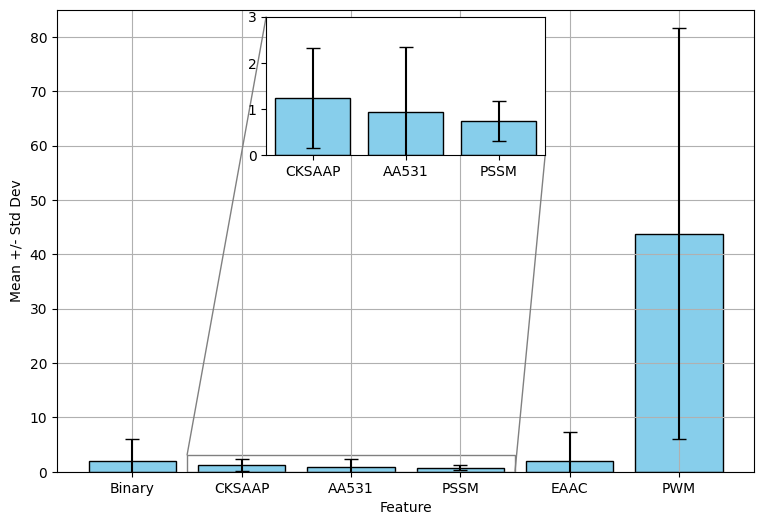

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import numpy as np

# Generate example data for six groups
data_group1 = all_data[0]
data_group2 = all_data[3]
data_group3 = all_data[-2]
data_group4 = all_data[-1]
data_group5 = all_data[1]
data_group6 = all_data[2]

# Calculate mean and standard deviation for each group
means = [np.mean(data_group1), np.mean(data_group2), np.mean(data_group3),
         np.mean(data_group4), np.mean(data_group5), np.mean(data_group6)]
std_devs = [np.std(data_group1), np.std(data_group2), np.std(data_group3),
            np.std(data_group4), np.std(data_group5), np.std(data_group6)]

# Create a list of group labels
group_labels = ['Binary', 'CKSAAP', 'AA531', 'PSSM', 'EAAC', 'PWM']

# Create a histogram with mean and standard deviation bars
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax.bar(group_labels, means, yerr=std_devs, capsize=5, color='skyblue', edgecolor='black', alpha=1)
ax.set_xlabel('Feature')
ax.set_ylabel('Mean +/- Std Dev')
ax.set_ylim(0,85)
ax.grid(True)

# Change the color of the figure's border
spines = plt.gca().spines
for spine in spines:
    spines[spine].set_color('black')

# Create an inset axes for the zoomed-in region
axins = inset_axes(ax, width='40%', height='30%', loc='upper center')

# Define the indices of the bars to zoom in on (CKSAAP, AA531, PSSM)
indices_to_zoom = [0, 1, 2, 3]

# Plot the zoomed-in bars
axins.bar(np.array(group_labels)[indices_to_zoom], np.array(means)[indices_to_zoom],
          yerr=np.array(std_devs)[indices_to_zoom], capsize=5, color='skyblue', edgecolor='black', alpha=1)

# Set limits for the inset axes
axins.set_xlim(0.5, len(indices_to_zoom)-0.5)
axins.set_ylim(0, 3)

# Mark the inset area on the parent axes
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('Fig 6-human_std.pdf', format='pdf', dpi=1200)
plt.show()